In [4]:
import matplotlib.pyplot as plt
import plot_utils as u
import csv
from pathlib import Path
import numpy as np

In [5]:
result_dir = Path('ift/ift-20230106230542-1')

In [6]:
with open(result_dir / 'controller_sample_times.csv', 'r') as f:
    tt = np.array([float(r) for r in f])

with open(result_dir / 'controller_iteration_values.csv', 'r') as f:
    iteration_history = np.array([float(r) for r in f])

with open(result_dir / 'controller_reference_values.csv', 'r') as f:
    reference_history = np.array([float(r) for r in f])

with open(result_dir / 'controller_error_values.csv', 'r') as f:
    error_history = np.array([float(r) for r in f])

with open(result_dir / 'controller_beta_values.csv', 'r') as f:
    beta_history = np.array([float(r) for r in f])

with open(result_dir / 'controller_parameter_values.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    parameters = np.asarray([[float(row[0]), float(row[1])] for row in csvreader])

with open(result_dir / 'controller_integral_term_values.csv', 'r') as f:
    integral_term_history = np.array([float(r) for r in f])    
    
time, dbs = u.load_dbs_output(result_dir)

In [7]:
shifted_reference_history = np.copy(reference_history)
shifted_reference_history[iteration_history == 0] = 0
edges = list(iter(np.where(np.diff(1 * (iteration_history == 1)))[0]))
n = len(edges)
for i, s in enumerate(edges[::2]):
    if 2 * i + 1 >= n:
        break
    e = edges[2 * i + 1]
    length = e - s
    if s < length:
        tmp = np.delete(shifted_reference_history, np.s_[:s])
        shifted_reference_history = np.insert(tmp, length + 1, np.zeros(s))
    else:
        tmp = np.delete(shifted_reference_history, np.s_[s-length:s])
        shifted_reference_history = np.insert(tmp, e - length + 1, np.zeros(length))

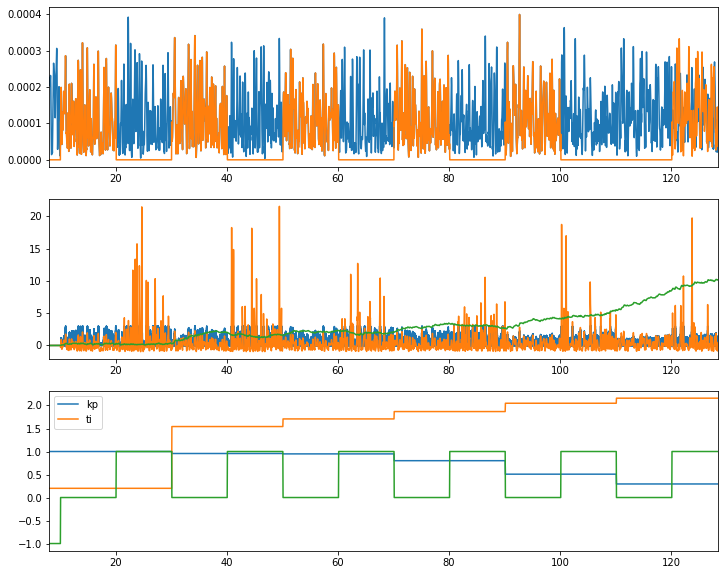

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
ax[0].plot(tt, beta_history)
ax[1].plot(time['signal'][:,0]/1000, -dbs['signal'][:,0])
ax[1].plot(tt, error_history)
ax[1].plot(tt, integral_term_history)
ax[2].plot(tt, parameters[:,0])
ax[2].plot(tt, parameters[:,1])
ax[2].plot(tt, iteration_history)
ax[2].legend(['kp', 'ti'])
ax[0].plot(tt, shifted_reference_history)

for a in ax:
    a.set_xlim([min(tt) - 0.1, max(tt) + 0.1])


Not found: configs


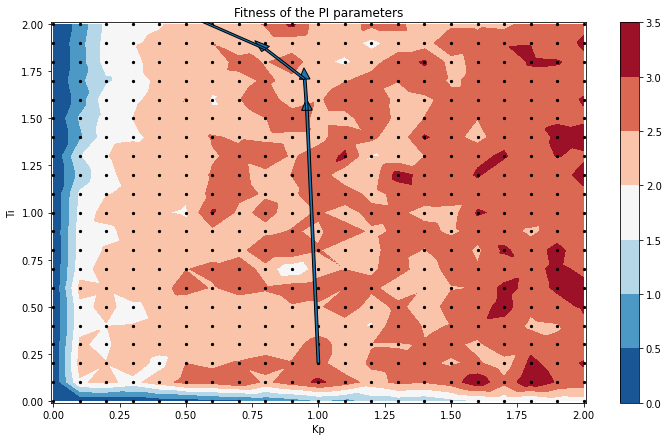

In [12]:
u.plot_ift_trajectory('PI_grid_search_12', parameters, lam=1)

Lambda: 0, Initial value: (0.05, 1.30), Final value: (2.41, 1.13)
Lambda: 1, Initial value: (1.00, 0.20), Final value: (0.20, 1.74)


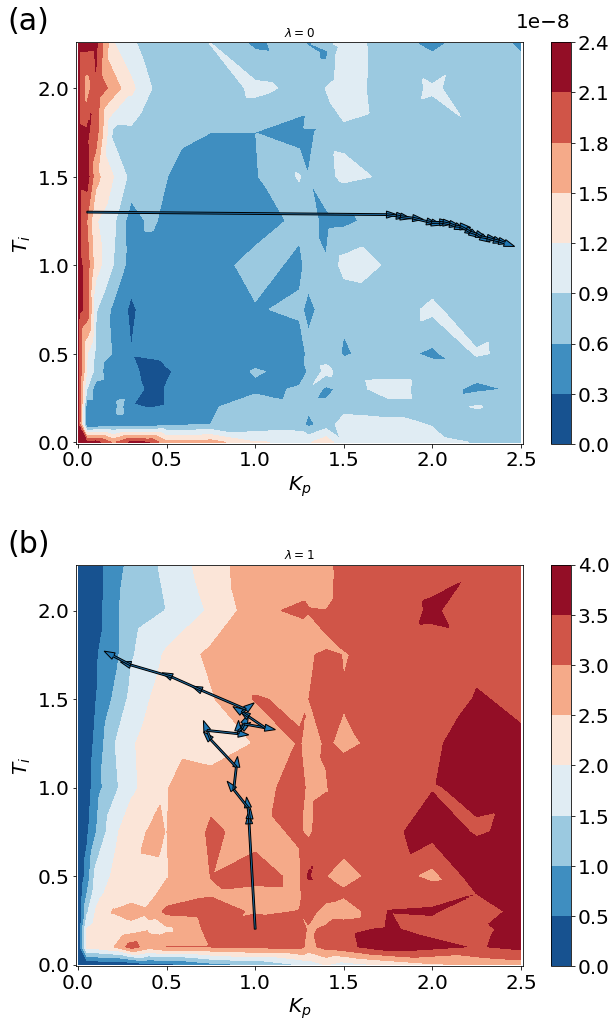

In [ ]:
u.plot_two_trajectories('Controller_Simulations\Amp\standard_PID_Controller',
                        'Controller_Simulations/IFT/iterative_feedback_tuning_PI_Controller-20221117150421/', 0,
                        'Controller_Simulations/IFT/iterative_feedback_tuning_PI_Controller-20221117120843/', 1,
                        timestop1=100, timestop2=100)
plt.savefig(Path('C:/cic/wrk/20221115_ner2023_paper/') / 'ift_working.eps', bbox_inches='tight')